 ## **Problem I**



**Question 1**

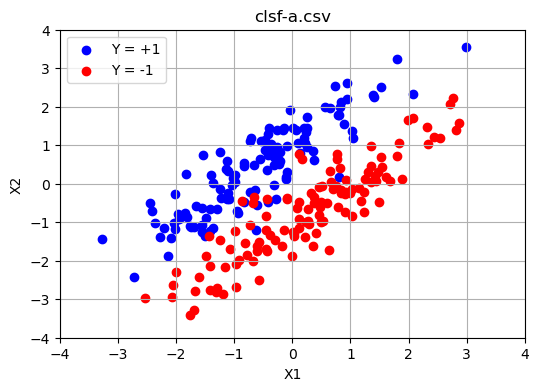

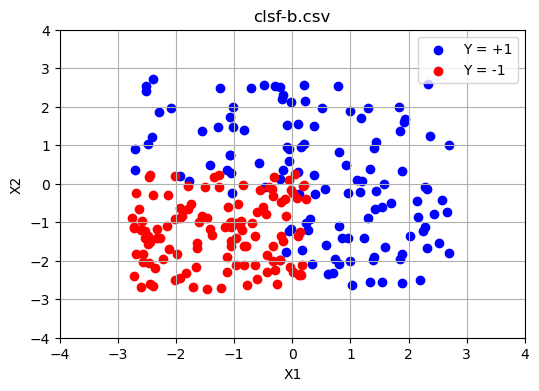

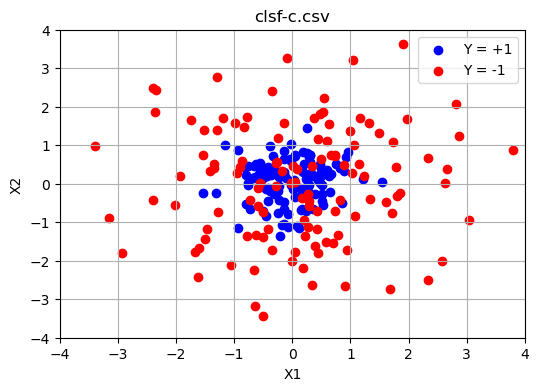

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#load the datasets 
def plot_q1(filename):

    #loading the dataset
    # print("Loadding dataset: ", filename) 
    df = pd.read_csv(filename)
    
    #print Information
    # print(df.head())
    # print(filename, "'s Minimum value of X1 ", df['X1'].min())
    # print(filename, "'s Minimum value of X2 ", df['X2'].min())
    # print(filename, "'s Maximum value of X1 ", df['X1'].max())
    # print(filename, "'s Maximum value of X2 ", df['X2'].max())

    #Divide dataset by Y (1, -1) 
    pos_df = df.loc[df['Y']== 1]
    # print("Positive Samples")
    # print(pos_df.head())
    neg_df = df.loc[df['Y']== -1]
    # print("Negative Samples")
    # print(neg_df.head())
    # print('\n')

    plt.figure(figsize=(6,4))
    # Plot positive samples as blue circles
    plt.scatter(pos_df['X1'], pos_df['X2'], color='blue', marker='o', label='Y = +1')
    # Plot negative samples as red circles
    plt.scatter(neg_df['X1'], neg_df['X2'], color='red', marker='o', label='Y = -1')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(filename)
    # 
    plt.axis([-4, 4, -4, 4])
    plt.legend()
    plt.grid(True)
    plt.show()

plot_q1("clsf-a.csv")
plot_q1("clsf-b.csv")
plot_q1("clsf-c.csv")

**Question 2**

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


def classification_accuracy(filename):
    df = pd.read_csv(filename)
    # print(df[['X1','X2']])
    # print(df['Y'])

    x_train = df[['X1','X2']]
    y_train = df['Y']

    # Decision tree 
    # Entropy criterion, max depth 2, random state 42
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
    dt.fit(x_train, y_train) 

    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train) 

    # Logistic regression
    lr = LogisticRegression()
    lr.fit(x_train, y_train) 

    # from tutorial week 4
    # most_important_feature = x_train.columns[dt.feature_importances_.argmax()]
    # print(f"\nThe most important attribute (Root Node) is: {most_important_feature}")

    print(f"\n DataSet:{filename}" )
    dt_accuracy = dt.score(x_train, y_train)
    print(f"\n  - Decision tree accuracy is: {dt_accuracy * 100:.1f}%")

    gnb_accuracy = gnb.score(x_train, y_train) 
    print(f"\n  - Gaussian Naive Bayes accuracy is: {gnb_accuracy * 100:.1f}%")

    lr_accuracy = lr.score(x_train, y_train) 
    print(f"\n  - Logistic regression accuracy is: {lr_accuracy * 100:.1f}%")

classification_accuracy("clsf-a.csv")
classification_accuracy("clsf-b.csv")
classification_accuracy("clsf-c.csv")



 DataSet:clsf-a.csv

  - Decision tree accuracy is: 81.2%

  - Gaussian Naive Bayes accuracy is: 92.9%

  - Logistic regression accuracy is: 95.4%

 DataSet:clsf-b.csv

  - Decision tree accuracy is: 95.0%

  - Gaussian Naive Bayes accuracy is: 90.4%

  - Logistic regression accuracy is: 85.0%

 DataSet:clsf-c.csv

  - Decision tree accuracy is: 75.4%

  - Gaussian Naive Bayes accuracy is: 80.4%

  - Logistic regression accuracy is: 53.8%


 ## **Problem II**


**Question 6**


In [3]:
import pandas as pd

# Load the sales dataset
df = pd.read_csv("indep.csv")
# print("independence Data Preview:")
# print(df.head())
# print(len(df))
# print(df.count())

# print("Joint Size Data:")
joint = df.groupby(['X1','X2']).size()
# print(joint)

# X1  X2
# 1   1     16 
#     2     30
# 2   1     17
#     2     17
# Total : 80

print("Question 6:")
#Using the joint/ total count get the probabilities
for (x1, x2), num in joint.items():
    p = num/len(df)
    print(f"\n Joint probability P(X1 = {x1}, X2 = {x2}) = {p * 100:.1f}%")



Question 6:

 Joint probability P(X1 = 1, X2 = 1) = 20.0%

 Joint probability P(X1 = 1, X2 = 2) = 37.5%

 Joint probability P(X1 = 2, X2 = 1) = 21.2%

 Joint probability P(X1 = 2, X2 = 2) = 21.2%


**Question 7**

### Use answer from Question 6 
### P(X2 = 1) = P(X1 = 1, X2 = 1) + P(X1 = 2, X2 = 1) = 20.0% + 21.2% = 41.2%
### P(X2 = 2) = P(X1 = 1, X2 = 2) + P(X1 = 2, X2 = 2) = 37.5% + 21.2% = 58.7%

In [4]:
import pandas as pd

# Load the sales dataset
df = pd.read_csv("indep.csv")

# print("Joint Size Data Preview:")
x1 = df.groupby(['X1']).size()
x2 = df.groupby(['X2']).size()
# print(x1)
# print(x2)
print("Question 7:")
print("Marginal probabilities:")
# Use answer from Question 6 
# P(X1 = 1) = P(X1 = 1, X2 = 1) + P(X1 = 1, X2 = 2) = 20.0% + 37.5% = 57.5%
# P(X1 = 1) = P(X1 = 2, X2 = 1) + P(X1 = 2, X2 = 2) = 21.2% + 21.2% = 42.4%
for i, num_x1 in x1.items():
    p_x1 = num_x1/len(df)
    print(f"P(X1 = {i}) = {p_x1 * 100:.1f}%")

# Use answer from Question 6 
# P(X2 = 1) = P(X1 = 1, X2 = 1) + P(X1 = 2, X2 = 1) = 20.0% + 21.2% = 41.2%
# P(X2 = 2) = P(X1 = 1, X2 = 2) + P(X1 = 2, X2 = 2) = 37.5% + 21.2% = 58.7%

for j, num_x2 in x2.items():
    p_x2 = num_x2/len(df)
    print(f"P(X2 = {j}) = {p_x2 * 100:.1f}%")


Question 7:
Marginal probabilities:
P(X1 = 1) = 57.5%
P(X1 = 2) = 42.5%
P(X2 = 1) = 41.2%
P(X2 = 2) = 58.8%


 ## **Problem III**


**Question 9**

In [5]:
import pandas as pd

# Load the sales dataset
df = pd.read_csv("nb.csv")

class_prior = df.groupby(['Y']).size()
# print(class_prior)
# print(len(df))

# Calculate Prior Probabilities: 
# Compute the probability of each class based on the training data.
print("Question 9:")
for i, num in class_prior.items():
    p = num/len(df)
    print(f"P(Y = {i}) = {p * 100:.1f}%")



Question 9:
P(Y = -1) = 75.0%
P(Y = 1) = 25.0%


**Question 10**

In [6]:
class_conditional_x1 = df.groupby(['Y', 'X1']).size()
class_conditional_x2 = df.groupby(['Y', 'X2']).size()
# print(class_conditional_x1)
# print(class_conditional_x2)

print("Question 10:")

for (y,x), i in class_conditional_x1.items():
    # print(y, x, i, class_prior[y])
    p = i/class_prior[y]
    print(f"P(X1 = {x}|Y = {y}) = {p * 100:.1f}%")

for (y,x), i in class_conditional_x2.items():
    # print(y, x, i, class_prior[y])
    p = i/class_prior[y]
    print(f"P(X2 = {x}|Y = {y}) = {p * 100:.1f}%")

Question 10:
P(X1 = 1|Y = -1) = 25.6%
P(X1 = 2|Y = -1) = 74.4%
P(X1 = 1|Y = 1) = 70.0%
P(X1 = 2|Y = 1) = 30.0%
P(X2 = 1|Y = -1) = 48.9%
P(X2 = 2|Y = -1) = 51.1%
P(X2 = 1|Y = 1) = 70.0%
P(X2 = 2|Y = 1) = 30.0%


 ## **Problem IV**


**Question 14**

In [7]:
import pandas as pd

# Load the sales dataset
df = pd.read_csv("mle.csv")
# print(df.head())

total = df['X'].sum()
# print(total)
lambda_value = len(df) / total
print("Question 14:")
print(lambda_value)

Question 14:
0.4303750242413215


 ## **Problem V**



**Question 15**

In [8]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("regr-1.csv")
df_3 = pd.read_csv("regr-3.csv")

# print(df[['X1','X2']])
# print(df[['X1']])
# print(df[['X1']].values.reshape(-1, 1))

# print(df['Y'])
# print(df.head())
x_train = df[['X1','X2']]
y_train = df['Y']

x_train_d3 = df_3[['X1','X2']]
y_train_d3 = df_3['Y']

#For Question 17 Size
print("Size of the sample dataset", len(df))


def linear_regression_q15(dataset_1, dataset_3, predictor_name):

    # Linear regression
    lr = LinearRegression(fit_intercept=False)
    lr.fit(dataset_1, y_train) 

    #predict the target values 
    y_pred = lr.predict(dataset_1)
    y_pred_d3 = lr.predict(dataset_3)
    
    # Calculate difference between predict values and actual value 'Y' using MSE method
    mse = mean_squared_error(y_train, y_pred)
    mse_d3 = mean_squared_error(y_train_d3, y_pred_d3)
    

    print(f"\n {predictor_name}:")
    print(f" - Dataset 1 mean squared error (MSE): {mse:.3f}")
    print(f" - Dataset 3 mean squared error (MSE): {mse_d3:.3f}")

# Q15.1 Using X1 and X2 to predict Y
linear_regression_q15(x_train, x_train_d3, "Using X1 and X2 to predict Y")

# Q15.2 Using only X1 to predict Y
x1 = df['X1'].values.reshape(-1, 1)
x1_d3 = df_3['X1'].values.reshape(-1, 1)

linear_regression_q15(x1, x1_d3, "Using only X1 to predict Y")

# Q15.3 Using only X2 to predict Y
x2 = df['X2'].values.reshape(-1, 1)
x2_d3 = df_3['X2'].values.reshape(-1, 1)

linear_regression_q15(x2, x2_d3, "Using only X2 to predict Y")

# Q15.4 Not using any feature to predict Y -> "predict Y =0"
dummy_feature = np.zeros((len(y_train), 1))
dummy_feature_d3 = np.zeros((len(y_train_d3), 1))
# print(dummy_feature)
print("\nThe Simple method for NO feature(USE Y=0): \n")
mse = mean_squared_error(y_train, dummy_feature)
mse_d3 = mean_squared_error(y_train_d3, dummy_feature_d3)
print(f" - Dataset 1 mean squared error (MSE): {mse:.3f}")
print(f" - Dataset 3 mean squared error (MSE): {mse_d3:.3f}")

linear_regression_q15(dummy_feature, dummy_feature_d3, "Not using any feature to predict Y. Thatis,predictY =0")



Size of the sample dataset 20

 Using X1 and X2 to predict Y:
 - Dataset 1 mean squared error (MSE): 1.397
 - Dataset 3 mean squared error (MSE): 1.148

 Using only X1 to predict Y:
 - Dataset 1 mean squared error (MSE): 1.431
 - Dataset 3 mean squared error (MSE): 1.077

 Using only X2 to predict Y:
 - Dataset 1 mean squared error (MSE): 2.159
 - Dataset 3 mean squared error (MSE): 2.547

The Simple method for NO feature(USE Y=0): 

 - Dataset 1 mean squared error (MSE): 2.347
 - Dataset 3 mean squared error (MSE): 2.226

 Not using any feature to predict Y. Thatis,predictY =0:
 - Dataset 1 mean squared error (MSE): 2.347
 - Dataset 3 mean squared error (MSE): 2.226


**Question 16**

In [9]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("regr-2.csv")
df_3 = pd.read_csv("regr-3.csv")
# print(df[['X1','X2']])
# print(df['Y'])
# print(df.head())

#dataset 1
x_train = df[['X1','X2']]
y_train = df['Y'].values.reshape(-1, 1)

#dataset 3
x_train_d3 = df_3[['X1','X2']]
y_train_d3 = df_3['Y'].values.reshape(-1, 1)


print("Size of the sample dataset", len(df))


def linear_regression_q15(dataset_2, dataset_3, predictor_name):

    # Linear regression
    lr = LinearRegression(fit_intercept=False)
    lr.fit(dataset_2, y_train) 

    y_pred = lr.predict(dataset_2)
    y_pred_d3 = lr.predict(dataset_3)


    mse = mean_squared_error(y_train, y_pred)
    mse_d3 = mean_squared_error(y_train_d3, y_pred_d3)

    print(f"\n{predictor_name}:")
    print(f" - Dataset 2 mean squared error (MSE): {mse:.3f}")
    print(f" - Dataset 3 mean squared error (MSE): {mse_d3:.3f}")

# Q16.1 Using X1 and X2 to predict Y
linear_regression_q15(x_train, df_3[['X1','X2']], "Using X1 and X2 to predict Y")

# Q16.2 Using only X1 to predict Y
x1 = df['X1'].values.reshape(-1, 1)
x1_d3 = df_3['X1'].values.reshape(-1, 1)

linear_regression_q15(x1, x1_d3, "Using only X1 to predict Y")

# Q16.3 Using only X2 to predict Y
x2 = df['X2'].values.reshape(-1, 1)
x2_d3 = df_3['X2'].values.reshape(-1, 1)
linear_regression_q15(x2, x2_d3, "Using only X2 to predict Y")

# Q16.4 Not using any feature to predict Y -> "predict Y =0"
dummy_feature = np.zeros((len(y_train), 1))
dummy_feature_d3 = np.zeros((len(df_3), 1))

print("The model method:")
linear_regression_q15(dummy_feature, dummy_feature_d3, "Not using any feature to predict Y. Thatis,predictY =0")

print("\nThe Simple method for NO feature(USE Y=0): \n")
mse = mean_squared_error(y_train, dummy_feature)
mse_d3 = mean_squared_error(y_train_d3, dummy_feature_d3)
print(f" - Dataset 2 mean squared error (MSE): {mse:.3f}")
print(f" - Dataset 3 mean squared error (MSE): {mse_d3:.3f}")


Size of the sample dataset 100

Using X1 and X2 to predict Y:
 - Dataset 2 mean squared error (MSE): 0.899
 - Dataset 3 mean squared error (MSE): 1.072

Using only X1 to predict Y:
 - Dataset 2 mean squared error (MSE): 0.931
 - Dataset 3 mean squared error (MSE): 1.055

Using only X2 to predict Y:
 - Dataset 2 mean squared error (MSE): 1.717
 - Dataset 3 mean squared error (MSE): 2.206
The model method:

Not using any feature to predict Y. Thatis,predictY =0:
 - Dataset 2 mean squared error (MSE): 1.736
 - Dataset 3 mean squared error (MSE): 2.226

The Simple method for NO feature(USE Y=0): 

 - Dataset 2 mean squared error (MSE): 1.736
 - Dataset 3 mean squared error (MSE): 2.226
